In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import statsmodels.api as sm

### Question 1

Japan: Interest Rate - 8%; Inflation 3%

France: Inflation - 12%

GBR: Interest Rate - 14%

Want to find the forward premium of $\frac{Pound}{Euro}$

Let us examine the relationship between JPY and EUR:

Assuming we start with 100JPY, $\frac{100J}{S(\frac{JPY}{EUR})}(1 + i_{EUR}) F(\frac{JPY}{EUR}) = 108J$

$\Longleftrightarrow \frac{100J}{S(\frac{JPY}{EUR})}(1 + i_{EUR}) \frac{1.03}{1.12}S(\frac{JPY}{EUR}) = 108J$

$\Rightarrow i_{EUR} = 0.174$

Let us examine the relationship between JPY and GBP:

We know the Japan inflation rate is 3%, which means the following relationship holds:

$F(\frac{JPY}{GBP}) = (\frac{1.03}{1 + inf_{GBP}})S(\frac{JPY}{GBP})$

Since CIP holds, the following relationship must hold as well:

Assuming we start with 100JPY, $\frac{100JPY}{S(\frac{JPY}{GBP})}(1.14)F(\frac{JPY}{GBP}) = 108JPY$

$\Longleftrightarrow \frac{100JPY}{S(\frac{JPY}{GBP})}(1.14)(\frac{1.03}{1 + inf_{GBP}})S(\frac{JPY}{GBP}) = 108JPY$

$\Longleftrightarrow (100JPY)(1.14)\frac{1.03}{1 + inf_{GBP}} = 108JPY$

$\Rightarrow inf_{GBP} = 0.0872$

Which means $F(\frac{Pound}{Euro}) = \frac{1.0872}{1.12}\approx 0.971$

Which is a discount of 2.9%.

### Question 2

In [192]:
curr_df = pd.read_csv(r'DevelCurrNet.csv')
curr_df['Dates'] = pd.to_datetime(curr_df['Dates'])
curr_df = curr_df.set_index('Dates')

In [193]:
curr_df.head()

Portfolio1  Portfolio2  Portfolio3  Portfolio4  Portfolio5  \
Dates                                                                    
1983-11-30   -0.012095   -0.027399   -0.027389    0.004479   -0.021928   
1983-12-30   -0.012908   -0.017959   -0.014105   -0.000604   -0.013942   
1984-01-31   -0.037178   -0.038833   -0.017082   -0.039918   -0.035541   
1984-02-29    0.037431    0.082226    0.077948    0.002571    0.075856   
1984-03-30    0.002371   -0.002277    0.036303   -0.033436    0.005234   

           RX = Mean HML = P5 - P1  
Dates                               
1983-11-30    -1.69%        -0.98%  
1983-12-30    -1.19%        -0.10%  
1984-01-31    -3.37%         0.16%  
1984-02-29     5.52%         3.84%  
1984-03-30     0.16%         0.29%

#### a)

In [194]:
short_pf = curr_df['Portfolio1']
long_pf = curr_df['Portfolio5']

In [195]:
cumul_ret = (long_pf - short_pf)
cumul_ret = np.cumprod(cumul_ret + 1)
cumul_ret = pd.DataFrame(cumul_ret)
cumul_ret.head()

0
Dates               
1983-11-30  0.990167
1983-12-30  0.989143
1984-01-31  0.990763
1984-02-29  1.028834
1984-03-30  1.031779

Text(0.5, 1.0, 'Cumulative Return')

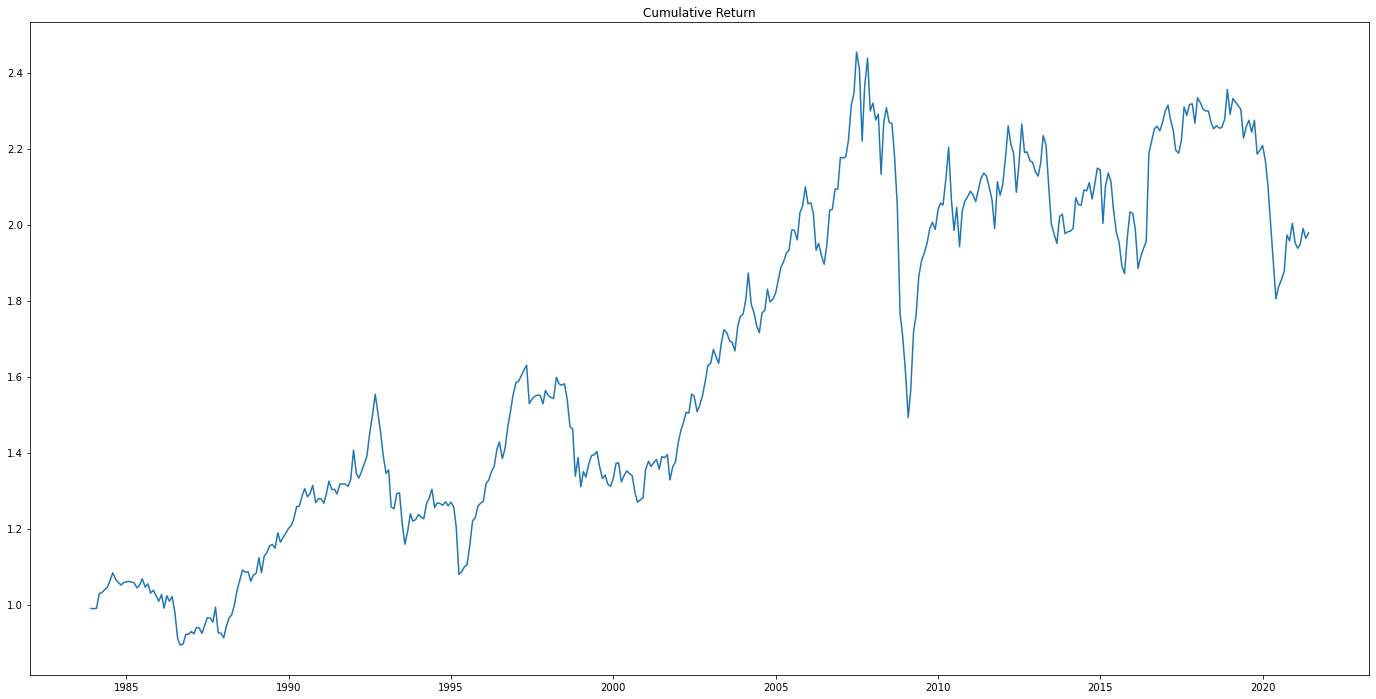

In [196]:
fig, ax = plt.subplots(1, 1, figsize = (24, 12))
ax.plot(cumul_ret)
ax.set_title('Cumulative Return')

#### b)

In [197]:
equity_vol = pd.read_csv(r'EquityVol.csv')
equity_vol['Dates'] = curr_df.index
equity_vol = equity_vol.set_index('Dates')
equity_vol.head()

Aggregate Equity Volatility
Dates                                  
1983-11-30                     0.009552
1983-12-30                     0.009090
1984-01-31                     0.019023
1984-02-29                     0.008861
1984-03-30                     0.008055

In [198]:
#Regress equity_vol on one lag of the cumulative return of the portfolio
y = equity_vol.iloc[1:].values
X = cumul_ret.iloc[:-1].values

model = sm.OLS(y,X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.730
Model:                            OLS   Adj. R-squared (uncentered):              0.729
Method:                 Least Squares   F-statistic:                              1213.
Date:                Mon, 27 Sep 2021   Prob (F-statistic):                   1.04e-129
Time:                        21:46:59   Log-Likelihood:                          1649.7
No. Observations:                 450   AIC:                                     -3297.
Df Residuals:                     449   BIC:                                     -3293.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0060      0.000     34.834      0.000       0.006       0.006
==============================================================================
Omnibus:                      247.575   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2329.308
Skew:                           2.199   Prob(JB):                         0.00
Kurtosis:                      13.242   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

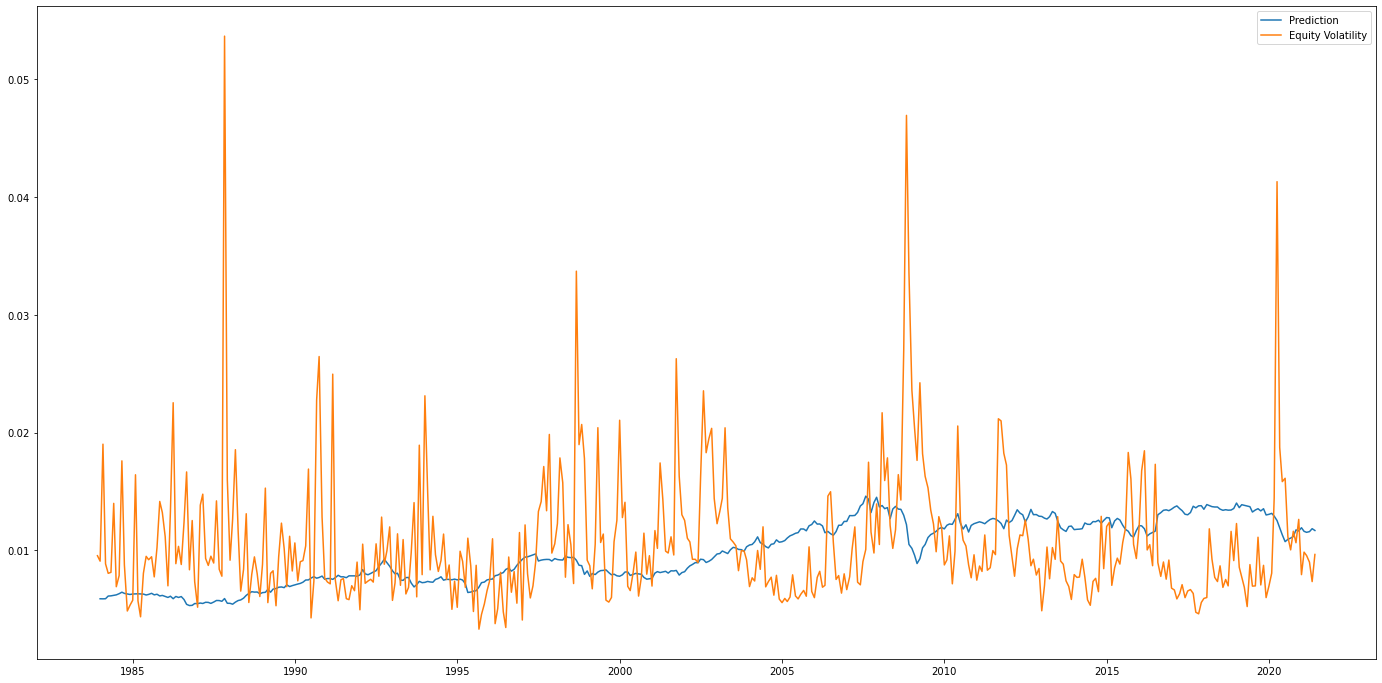

In [199]:
fig, ax = plt.subplots(1, 1, figsize = (24, 12))
ax.plot(equity_vol.index[1:], results.predict(), label = 'Prediction')
ax.plot(equity_vol, label = 'Equity Volatility')
ax.legend(loc = 'best')

We regressed Equity Market Volatility on one-lag of the portfolio cumulative returns and did find significant results. The r-squared value is 0.73 which implies a good fit of the model despite the graph showing that the fit appears to miss many of the jumps. Additionally, we have a very low p-value and standard error for the coefficient so we can infer that there is a relationship.

#### c)

In [200]:
#Assumed for part c that we are first investing in the portfolio on Jan 1, 2010
cumul_ret_2010 = (long_pf.loc[long_pf.index >= '2010-01-01'] - short_pf.loc[short_pf.index >= '2010-01-01'])
cumul_ret_2010 = np.cumprod(cumul_ret_2010 + 1)
cumul_ret_2010.head()

Dates
2010-01-29    1.008950
2010-02-26    1.006572
2010-03-31    1.041305
2010-04-30    1.080927
2010-05-31    1.013594
dtype: float64

Text(0.5, 1.0, 'Portfolio Performance Since 2010')

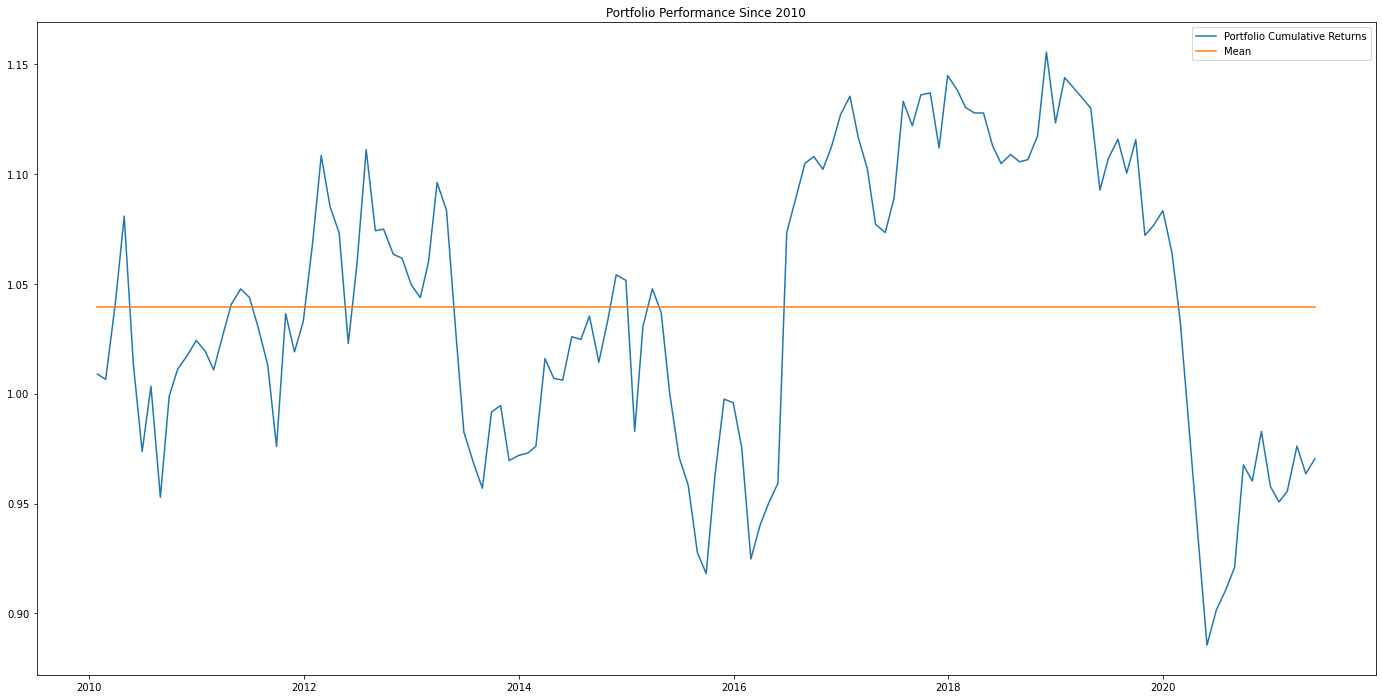

In [201]:
fig, ax = plt.subplots(1, 1, figsize = (24, 12))
ax.plot(cumul_ret_2010, label = 'Portfolio Cumulative Returns')
ax.plot(cumul_ret_2010.index, [np.mean(cumul_ret_2010)] * len(cumul_ret_2010.index), label = 'Mean')
ax.legend(loc = 'best')
ax.set_title('Portfolio Performance Since 2010')

The average of the portfolio has remained positive, so in that sense it has performed well, but it has underperformed compared to S&P. The portfolio is HML, and since the average of this is positive it means that 'H' has gained more than 'L' has lost. 

'HML' in a currency perspective represents going long in the highest interest rate currency and short in the lowest interest rate currency. This essentially represents going long on the countries with the riskier economies and short in the safer economies. In periods of stability and economic growth, riskier investments will gain more than safe investments will lose which can be seen in the ~2017-2020 period above (when markets were breaking records weekly). Conversely, in periods of turmoil such as COVID, the riskier investments will lose more than the safer investments will gain which is evident in the steep decline in the graph above around March 2020. 

### Question 3

In [202]:
cpi_data = pd.read_csv(r'CPIData_Filtered.csv')
cpi_data = cpi_data[cpi_data['Measure'] == 'Index']
cpi_data = cpi_data[cpi_data['Subject'] == 'CPI: 01-12 - All items']
cpi_data.head()

LOCATION   Country   SUBJECT                 Subject MEASURE Measure  \
206      PRT  Portugal  CPALTT01  CPI: 01-12 - All items    IXOB   Index   
207      PRT  Portugal  CPALTT01  CPI: 01-12 - All items    IXOB   Index   
208      PRT  Portugal  CPALTT01  CPI: 01-12 - All items    IXOB   Index   
209      PRT  Portugal  CPALTT01  CPI: 01-12 - All items    IXOB   Index   
210      PRT  Portugal  CPALTT01  CPI: 01-12 - All items    IXOB   Index   

    FREQUENCY  Frequency     TIME     Time Unit Code   Unit  PowerCode Code  \
206         Q  Quarterly  1970-Q1  Q1-1970       IDX  Index               0   
207         Q  Quarterly  1970-Q2  Q2-1970       IDX  Index               0   
208         Q  Quarterly  1970-Q3  Q3-1970       IDX  Index               0   
209         Q  Quarterly  1970-Q4  Q4-1970       IDX  Index               0   
210         Q  Quarterly  1971-Q1  Q1-1971       IDX  Index               0   

    PowerCode Reference Period Code Reference Period     Value Flag Codes  \
206     Units              2015_100         2015=100  1.691882        NaN   
207     Units              2015_100         2015=100  1.687932        NaN   
208     Units              2015_100         2015=100  1.713606        NaN   
209     Units              2015_100         2015=100  1.750472        NaN   
210     Units              2015_100         2015=100  1.815646        NaN   

    Flags  
206   NaN  
207   NaN  
208   NaN  
209   NaN  
210   NaN

In [203]:
cpi_data_trimmed = pd.DataFrame()
cpi_data_trimmed['Country'] = cpi_data['Country']
cpi_data_trimmed['TIME'] = pd.to_datetime(cpi_data['TIME'])
cpi_data_trimmed['Value'] = cpi_data['Value']
cpi_data_trimmed.head()

Country       TIME     Value
206  Portugal 1970-01-01  1.691882
207  Portugal 1970-04-01  1.687932
208  Portugal 1970-07-01  1.713606
209  Portugal 1970-10-01  1.750472
210  Portugal 1971-01-01  1.815646

In [204]:
country_list = cpi_data_trimmed['Country'].unique()

print('Countries Chosen: \n')
for country in country_list:
    print(country)

Countries Chosen: 

Portugal
United Kingdom
India
Switzerland
United States
Japan


In [205]:
def find_ppp(cpi_data, foreign_country):
    
    foreign_df = cpi_data[cpi_data['Country'] == foreign_country]
    us_df = cpi_data[cpi_data['Country'] == 'United States']
    
    foreign_df = foreign_df.sort_values('TIME', ascending = True)
    us_df = us_df.sort_values('TIME', ascending = True)

    ppp_arr = [us_df.iloc[i, 2] / foreign_df.iloc[i, 2] for i in range(len(us_df))]
    
    ppp_df = pd.DataFrame(data = ppp_arr, index = us_df['TIME'])
   
    
    return ppp_df   
    
def find_rel_ppp(inflation_data, foreign_country):
    
    foreign_df = inflation_data[inflation_data['Country'] == foreign_country]
    us_df = inflation_data[inflation_data['Country'] == 'United States']
    
    foreign_df = foreign_df.sort_values('TIME', ascending = True)
    us_df = us_df.sort_values('TIME', ascending = True)

    e_arr = [(us_df.iloc[i, 2] - foreign_df.iloc[i, 2]) for i in range(len(us_df))]
    
    e_df = pd.DataFrame(data = e_arr, index = us_df['TIME'])
    
    return e_df

def find_real_exchange(inflation_data, foreign_country):
    
    foreign_df = inflation_data[inflation_data['Country'] == foreign_country]
    us_df = inflation_data[inflation_data['Country'] == 'United States']
    
    foreign_df = foreign_df.sort_values('TIME', ascending = True)
    us_df = us_df.sort_values('TIME', ascending = True)
    
    e_df = find_rel_ppp(inflation_data, foreign_country)
    
    real_exchange = [(1 + us_df.iloc[i, 2]) / ((1 + e_df.iloc[i]) * (1 + foreign_df.iloc[i, 2])) for i in range(len(us_df))]
    
    real_df = pd.DataFrame(data = real_exchange, index = us_df['TIME'])
    
    return real_df

In [206]:
foreign_countries = np.delete(country_list, 4)

print('Foreign Countries: \n')
for country in foreign_countries:
    print(country)

Foreign Countries: 

Portugal
United Kingdom
India
Switzerland
Japan


In [207]:
portugal_ppp = find_ppp(cpi_data_trimmed, foreign_countries[0])
uk_ppp = find_ppp(cpi_data_trimmed, foreign_countries[1])
india_ppp = find_ppp(cpi_data_trimmed, foreign_countries[2])
swiss_ppp = find_ppp(cpi_data_trimmed, foreign_countries[3])
japan_ppp = find_ppp(cpi_data_trimmed, foreign_countries[4])

ppp_df = pd.DataFrame(index = portugal_ppp.index)
ppp_df['Portugal'] = portugal_ppp
ppp_df['UK'] = uk_ppp
ppp_df['India'] = india_ppp
ppp_df['Switzerland'] = swiss_ppp
ppp_df['Japan'] = japan_ppp
ppp_df

Portugal        UK     India  Switzerland     Japan
TIME                                                           
1970-01-01  9.476199  1.961387  5.361858     0.480319  0.518027
1970-04-01  9.656680  1.947381  5.294307     0.484243  0.519259
1970-07-01  9.618687  1.947353  5.240043     0.483179  0.523951
1970-10-01  9.544660  1.933729  5.283034     0.479736  0.516614
1971-01-01  9.271763  1.896574  5.437871     0.474729  0.512992
...              ...       ...       ...          ...       ...
2020-04-01  1.043374  0.996983  0.857626     1.076025  1.063775
2020-07-01  1.062759  1.004566  0.847532     1.089460  1.076528
2020-10-01  1.060797  1.005034  0.835045     1.094225  1.084062
2021-01-01  1.075764  1.013963  0.847317     1.104557  1.092403
2021-04-01  1.085638  1.024589  0.853743     1.122650  1.123590

[206 rows x 5 columns]

In [208]:
fig, ax = plt.subplots(1, 1, figsize = (24, 12))

ax.plot(portugal_ppp, label = 'Portugal')
ax.plot(uk_ppp, label = 'UK')
ax.plot(india_ppp, label = 'India')
ax.plot(swiss_ppp, label = 'Switzerland')
ax.plot(japan_ppp, label = 'Japan')
ax.tick_params(axis = 'x', rotation = 90)
ax.legend(loc = 'best')
ax.set_title('PPP')      

Text(0.5, 1.0, 'PPP')

In [209]:
# inflation_df = pd.read_csv(r'InflationData_Filtered.csv')
# inflation_df = inflation_df[inflation_df['Measure'] == 'Index']
# inflation_df = inflation_df[inflation_df['Subject'] == 'CPI: 01-12 - All items']

inflation_df = pd.read_csv(r'InflationData_Filtered_Perc.csv')
inflation_df = inflation_df[inflation_df['Measure'] == 'Percentage change on the same period of the previous year']
inflation_df = inflation_df[inflation_df['Subject'] == 'CPI: 01-12 - All items']
inflation_df['Value'] = inflation_df['Value'] / 100

inflation_trimmed = pd.DataFrame()
inflation_trimmed['Country'] = inflation_df['Country']
inflation_trimmed['TIME'] = pd.to_datetime(inflation_df['TIME'])
inflation_trimmed['Value'] = inflation_df['Value']

inflation_trimmed.head()

Country       TIME     Value
0  Portugal 1990-01-01  0.129354
1  Portugal 1990-04-01  0.137306
2  Portugal 1990-07-01  0.134997
3  Portugal 1990-10-01  0.143107
4  Portugal 1991-01-01  0.133373

In [210]:
fig, ax = plt.subplots(1, 1, figsize = (24, 12))

portugal_e = find_rel_ppp(inflation_trimmed, foreign_countries[0])
uk_e = find_rel_ppp(inflation_trimmed, foreign_countries[1])
india_e = find_rel_ppp(inflation_trimmed, foreign_countries[2])
swiss_e = find_rel_ppp(inflation_trimmed, foreign_countries[3])
japan_e = find_rel_ppp(inflation_trimmed, foreign_countries[4])

ax.plot(portugal_e, label = 'Portugal')
ax.plot(uk_e, label = 'UK')
ax.plot(india_e, label = 'India')
ax.plot(swiss_e, label = 'Switzerland')
ax.plot(japan_e, label = 'Japan')
ax.tick_params(axis = 'x', rotation = 90)
ax.legend(loc = 'best')
ax.set_title('Rate of Change of Exchange Rate (e)')   


Text(0.5, 1.0, 'Rate of Change of Exchange Rate (e)')

In [211]:
portugal_real = find_real_exchange(inflation_trimmed, foreign_countries[0])
uk_real = find_real_exchange(inflation_trimmed, foreign_countries[1])
india_real = find_real_exchange(inflation_trimmed, foreign_countries[2])
swiss_real = find_real_exchange(inflation_trimmed, foreign_countries[3])
japan_real = find_real_exchange(inflation_trimmed, foreign_countries[4])

real_exchange_df = pd.DataFrame(index = portugal_real.index)
real_exchange_df['Portugal'] = portugal_real
real_exchange_df['UK'] = uk_real
real_exchange_df['India'] = india_real
real_exchange_df['Switzerland'] = swiss_real
real_exchange_df['Japan'] = japan_real
real_exchange_df

Portugal        UK     India  Switzerland     Japan
TIME                                                           
1990-01-01  1.009559  1.000503  1.000469     0.999874  0.999403
1990-04-01  1.012157  1.002621  1.002735     1.000150  0.999501
1990-07-01  1.010293  1.002730  1.003200     1.000169  0.999275
1990-10-01  1.011015  1.002585  1.007146     0.999816  0.999138
1991-01-01  1.010305  1.002491  1.014081     1.000322  0.999450
...              ...       ...       ...          ...       ...
2020-04-01  1.000017  1.000035  1.002513     1.000193  0.999997
2020-07-01  1.000000  0.999967  1.002360     1.000178  0.999983
2020-10-01  1.000024  0.999965  1.001820     1.000131  1.000171
2021-01-01  0.999940  0.999912  1.001106     1.000099  1.000127
2021-04-01  0.999701  0.999450  1.000242     0.999795  1.000431

[126 rows x 5 columns]

Text(0.5, 1.0, 'Real Exchange Rate')

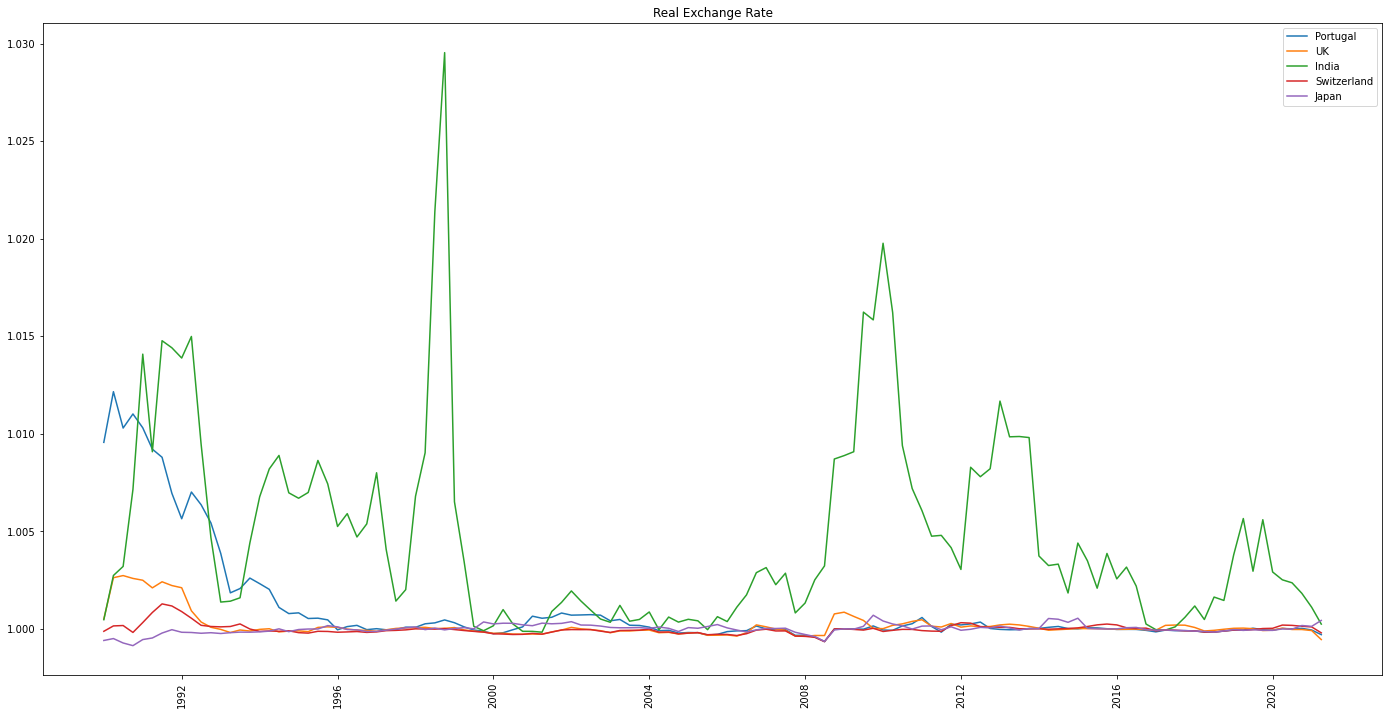

In [212]:
fig, ax = plt.subplots(1, 1, figsize = (24, 12))

ax.plot(portugal_real, label = 'Portugal')
ax.plot(uk_real, label = 'UK')
ax.plot(india_real, label = 'India')
ax.plot(swiss_real, label = 'Switzerland')
ax.plot(japan_real, label = 'Japan')
ax.tick_params(axis = 'x', rotation = 90)
ax.legend(loc = 'best')
ax.set_title('Real Exchange Rate') 

Let us examine the Portugal real exchange rate to explore for mean reversion:

In [213]:
mod = sm.tsa.arima.ARIMA(portugal_real, order=(1, 0, 0), freq = 'QS-OCT')
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                  126
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 767.261
Date:                Mon, 27 Sep 2021   AIC                          -1528.523
Time:                        21:47:01   BIC                          -1520.014
Sample:                    01-01-1990   HQIC                         -1525.066
                         - 04-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0010      0.001    984.700      0.000       0.999       1.003
ar.L1          0.9396      0.016     60.467      0.000       0.909       0.970
sigma2      2.926e-07    1.9e-08     15.436      0.0

C:\Users\neilk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  warnings.warn('No frequency information was'


In [214]:
print('ADF Test-Statistic: ' + str(sm.tsa.stattools.adfuller(portugal_real)[0]))

ADF Test-Statistic: -6.642950494722072


From the AR(1) regression, we do not see evidence of a unit-root which does imply mean-reversion. Although the coefficient is relatively close to 1 it is still far enough away from 1 to infer that there is no existence of unit root, additionally the ADF test statistic is significant and we can reject the null that a unit-root exists and infer that the series does mean-revert.

Now, let us examine exchange rate data taken from GFD. I chose USD/GBP for the analysis:

In [215]:
usdgbp = pd.read_csv(r'USDGBPExchange.csv')
usdgbp['Date'] = pd.to_datetime(usdgbp['Date'])
usdgbp = usdgbp.set_index('Date')
usdgbp.head()

USDGBP_Close
Date                    
1983-11-30        0.6835
1983-12-31        0.6889
1984-01-31        0.7137
1984-02-29        0.6709
1984-03-31        0.6957

In [216]:
fig, ax = plt.subplots(1, 1, figsize = (24, 12))
ax.plot(usdgbp)
ax.set_title('USD/GBP')

Text(0.5, 1.0, 'USD/GBP')

In [217]:
mod = sm.tsa.arima.ARIMA(usdgbp, order=(1, 0, 0), freq = 'M')
res = mod.fit()
print(res.summary())

                               SARIMAX Results                                
Dep. Variable:           USDGBP_Close   No. Observations:                  455
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1168.114
Date:                Mon, 27 Sep 2021   AIC                          -2330.228
Time:                        21:47:02   BIC                          -2317.867
Sample:                    11-30-1983   HQIC                         -2325.358
                         - 09-30-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6510      0.033     19.900      0.000       0.587       0.715
ar.L1          0.9734      0.009    105.553      0.000       0.955       0.991
sigma2         0.0003   1.66e-05     20.650      0.0

C:\Users\neilk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [218]:
print('ADF Test-Statistic: ' + str(sm.tsa.stattools.adfuller(usdgbp)[0]))

ADF Test-Statistic: -2.4183549120227052


We see that both the AR(1) and ADF test indicate absence of a unit root, and we can technically conclude that the series does mean revert. However, the AR(1) coefficient is very close to 1, and the ADF test statistic is low enough that is falls into the gray area where one could possibly not reject the null as well. Although not rejecting the null does not immediately lead to existence of a unit root, the relatively low significance in the ADF test in combination with the AR(1) coefficient being close to 1 could result in an inconclusive test. 